In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Define column names

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Display the DataFrame
DF.head()

,ID1,ID2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [ ]:
from google.colab import files
files.upload()  # Select and upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezaakhavansafaei","key":"7a1024303e3fdd5f892634f1f6326f03"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d wolfram77/graphs-snap-higgs-twitter -p /content


 92% 111M/120M [00:00<00:00, 168MB/s] 
100% 120M/120M [00:00<00:00, 137MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/graphs-snap-higgs-twitter.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [ ]:
import pandas as pd

# Replace the path with the correct one if needed
file_path = '/content/higgs-activity_time.txt'

# Define column names
columns = ['id1', 'id2', 'timestamp', 'action']

# Read the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', header=None, names=columns)

# Display the DataFrame
df.head()

,id1,id2,timestamp,action
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
2,376989,50329,1341101181,RT
3,26375,168366,1341101183,MT
4,376989,13813,1341101192,RT


In [ ]:
import pandas as pd

# Assuming you have already defined Df and df

# Find all unique IDs in Df (ID1 + ID2 set)
unique_ids_set = set(DF['ID1']).union(set(DF['ID2']))

# Filter df to keep only records with valid IDs in id1 or id2
df_filtered = df[df['id1'].isin(unique_ids_set) & df['id2'].isin(unique_ids_set)]

# Display the filtered DataFrame
df_filtered

,id1,id2,timestamp,action
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
7,99258,50329,1341101263,RT
12,75083,84647,1341101732,RT
13,75083,42182,1341101732,MT
...,...,...,...,...
563055,85314,85314,1341705426,MT
563058,9021,80429,1341705452,MT
563059,9021,80429,1341705452,RE
563065,19979,49694,1341705552,MT


In [ ]:
df=df_filtered

In [ ]:
# Function to print a dictionary up to a specified number of records
def print_dictionary(dictionary, limit=100):
    print("{")
    count = 0
    for key, value in dictionary.items():
        if count >= limit:
            break
        print(f"    {key}: {value}")
        count += 1
    print("}")


In [ ]:
# Assuming you have already read the file and have the pandas DataFrame 'df'

# Initialize the dictionaries to store the results
MT_dict = {}
RT_dict = {}
RE_dict = {}
merged_dict = {}
total_dict = {}

# Set the number of records to process before printing the progress
records_to_print = 1000
processed_records = 0
total_records = len(df)

# Loop over the DataFrame
for index, row in df.iterrows():
    if row['action'] == 'MT':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in MT_dict:
            MT_dict[key] = []

        # Append the value to the list
        MT_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]

        merged_dict[key].append(f"MT-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)
    elif row['action'] == 'RT':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in RT_dict:
            RT_dict[key] = []

        # Append the value to the list
        RT_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]
        merged_dict[key].append(f"RT-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)
    elif row['action'] == 'RE':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in RE_dict:
            RE_dict[key] = []

        # Append the value to the list
        RE_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]
        merged_dict[key].append(f"RE-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)

    processed_records += 1
    if processed_records % records_to_print == 0 or processed_records == total_records:
        percentage_complete = (processed_records / total_records) * 100
        print(f'\rProgress: {percentage_complete:.2f}%  ', end='')

# Display the merged dictionary
print("\nMerged Dictionary:")
print_dictionary(merged_dict, limit=10)
print("\nTotal Dictionary:")
print_dictionary(total_dict, limit=10)

Progress: 100.00%  
Merged Dictionary:
{
    213163: ['MT-223789', 'RE-223789', 'MT-213163', 'MT-246023', 'RE-246023', 'MT-213163']
    50329: ['RT-99258', 'RT-56426', 'RT-153793', 'RT-184805', 'RT-832', 'RT-30184', 'RT-832', 'RT-56426', 'RT-84647', 'RT-36417', 'MT-50191', 'MT-832', 'MT-26129', 'MT-9952']
    84647: ['RT-75083', 'MT-3604', 'RT-3933', 'MT-68939', 'MT-64367', 'RT-42180', 'MT-44086', 'RT-3604', 'RT-22814', 'MT-22814', 'MT-11953', 'RT-11953', 'MT-6793', 'MT-11953', 'RT-88838']
    42182: ['MT-75083', 'MT-89805', 'RT-6072', 'RT-103447', 'MT-89805', 'MT-89805', 'MT-89805', 'MT-6072', 'RE-6072', 'RT-6072', 'RT-56968', 'MT-89805', 'RT-39885', 'RT-35604', 'MT-92274', 'MT-92274', 'RT-25661', 'MT-89805', 'MT-42182', 'RT-6072', 'MT-42172', 'RT-116270', 'MT-89805', 'MT-11991', 'MT-56968', 'MT-6072', 'RE-6072', 'RT-96198', 'MT-1276', 'RT-4182', 'RT-86501', 'RT-136057', 'RT-44086', 'MT-2373', 'MT-89805', 'RT-65926', 'RT-31022', 'RT-35604', 'RT-175264', 'MT-2527', 'RT-39885', 'MT-6361

In [ ]:
# Assuming you have already read the file and have the pandas DataFrame 'df'

# Initialize the dictionaries to store the results
mention_dict = {}
retweet_dict = {}
reply_dict = {}
merged = {}
total = {}

# Set the number of records to process before printing the progress
records_to_print = 1000
processed_records = 0
total_records = len(df)

# Loop over the DataFrame
for index, row in df.iterrows():
    if row['action'] == 'MT':
        key = row['id1']
        value = row['id2']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in mention_dict:
            mention_dict[key] = []

        # Append the value to the list
        mention_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged:
            merged[key] =[]

        merged[key].append(f"MT-{value}")
        if key not in total:
            total[key] =[]

        total[key].append(value)
    elif row['action'] == 'RT':
        key = row['id1']
        value = row['id2']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in retweet_dict:
            retweet_dict[key] = []

        # Append the value to the list
        retweet_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged:
            merged[key] =[]
        merged[key].append(f"RT-{value}")
        if key not in total:
            total[key] =[]

        total[key].append(value)
    elif row['action'] == 'RE':
        key = row['id1']
        value = row['id2']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in reply_dict:
            reply_dict[key] = []

        # Append the value to the list
        reply_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged:
            merged[key] =[]
        merged[key].append(f"RE-{value}")
        if key not in total:
            total[key] =[]

        total[key].append(value)

    processed_records += 1
    if processed_records % records_to_print == 0 or processed_records == total_records:
        percentage_complete = (processed_records / total_records) * 100
        print(f'\rProgress: {percentage_complete:.2f}%  ', end='')

# Display the merged dictionary
print("\nMerged Dictionary:")
print_dictionary(merged, limit=10)
print("\nTotal Dictionary:")
print_dictionary(total, limit=10)

Progress: 100.00%  
Merged Dictionary:
{
    223789: ['MT-213163', 'RE-213163', 'RT-251638', 'RT-88', 'MT-66977', 'MT-2994', 'MT-138464', 'RE-138464', 'RT-138464']
    99258: ['RT-50329']
    75083: ['RT-84647', 'MT-42182', 'MT-13808', 'RT-11876', 'MT-39564', 'RE-39564', 'MT-88', 'MT-3998', 'RE-3998', 'RT-30324', 'RT-30324', 'RT-88', 'MT-88', 'RT-26158', 'RT-5137', 'RT-349', 'RT-349', 'MT-349', 'RE-349', 'MT-553', 'RE-553', 'MT-88', 'RT-3998', 'MT-13813', 'MT-88', 'RT-3998', 'RT-56968', 'MT-88', 'RT-27311', 'MT-677', 'MT-553', 'RE-553', 'MT-3027', 'MT-3027', 'RT-11991', 'RT-88', 'RT-2567', 'RT-49007', 'MT-468', 'RT-2941', 'RT-2941', 'MT-24704', 'RT-5079', 'MT-88', 'RT-88', 'MT-64911', 'MT-52087', 'MT-50595', 'RT-3237']
    10284: ['MT-2417', 'MT-10375', 'RT-1298', 'MT-1298', 'RT-383', 'RT-6119', 'RT-26514', 'RT-26514']
    5393: ['MT-26637', 'MT-5393', 'MT-7414', 'MT-33666']
    50219: ['MT-4665', 'MT-26398', 'RT-4665', 'MT-63931', 'MT-4665', 'RT-4665', 'MT-4665', 'MT-27484', 'MT-4665'

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Assuming you have already created the merged_dict
# Convert the merged_dict to a list of lists (transactions)
transactions = list(total_dict.values())

# Initialize the TransactionEncoder
te = TransactionEncoder()
# Fit and transform the transactions using the TransactionEncoder
te_ary = te.fit(transactions).transform(transactions)
# Convert the transformed array back to a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [ ]:
# Apply the Apriori algorithm to calculate frequent itemsets 3
frequent_itemsets = apriori(df_encoded, min_support=0.00094, use_colnames=True)

# Extract the item and its support value from the frequent itemsets DataFrame
frequent_items_with_support = frequent_itemsets[['itemsets', 'support']]

# Sort the frequent items by support in descending order
frequent_items_with_support = frequent_items_with_support.sort_values(by='support', ascending=False)

# Display the frequent items along with their support values (sorted by support)
frequent_items_with_support.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support
527,(89805),0.014862
274,(38535),0.010857
10,(492),0.007062
208,(27705),0.006008
20,(1276),0.005481


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Calculate the length of each itemset and add it as a new column 'length'
frequent_items_with_support['length'] = frequent_items_with_support['itemsets'].apply(lambda x: len(x))

# Calculate the mean and mode of the 'length' column
mean_length = frequent_items_with_support['length'].mean()
mode_length = frequent_items_with_support['length'].mode().iloc[0]

# Display the frequent items along with their support values and the calculated mean and mode of the length
print("Mean Length of Itemsets:", mean_length)
print("Mode Length of Itemsets:", mode_length)
frequent_items_with_support.head()


Mean Length of Itemsets: 1.8677639046538026
Mode Length of Itemsets: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length
527,(89805),0.014862,1
274,(38535),0.010857,1
10,(492),0.007062,1
208,(27705),0.006008,1
20,(1276),0.005481,1


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Group the frequent itemsets by their lengths and calculate the count of itemsets for each length
itemsets_count_by_length = frequent_items_with_support.groupby('length').count()

# Rename the column to 'count'
itemsets_count_by_length.rename(columns={'itemsets': 'count'}, inplace=True)

# Display the itemsets count by length
itemsets_count_by_length.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support
length,,
1,727,727
2,613,613
3,354,354
4,64,64
5,4,4


In [ ]:
import pandas as pd

# ... (Previous code up to 'itemsets_count_by_length')

# Calculate the product of length and count and create a new column 'length_times_count'
itemsets_count_by_length['length_times_count'] = itemsets_count_by_length['count'] * itemsets_count_by_length.index

# Display the updated DataFrame
itemsets_count_by_length.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support,length_times_count
length,,,
1,727,727,727
2,613,613,1226
3,354,354,1062
4,64,64,256
5,4,4,20


In [ ]:
# Calculate the sum of the 'length_times_count' column
sum_length_times_count = itemsets_count_by_length['length_times_count'].sum()

# Display the sum of length_times_count
print('Sum of length_times_count:', sum_length_times_count)
print('')

Sum of length_times_count: 3291



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import networkx as nx

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(DF, source='ID1', target='ID2', create_using=nx.DiGraph())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the adjacency list representation
adjacency_list = G.adjacency()

# Convert the adjacency list to a dictionary of lists
adjacency_dict = {node: [neighbor for neighbor in neighbors] for node, neighbors in adjacency_list}
followings_dict=adjacency_dict
print(adjacency_dict)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd
import networkx as nx

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(DF, source='ID2', target='ID1', create_using=nx.DiGraph())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the adjacency list representation
adjacency_list = G.adjacency()

# Convert the adjacency list to a dictionary of lists
adjacency_dict = {node: [neighbor for neighbor in neighbors] for node, neighbors in adjacency_list}
followers_dict=adjacency_dict
print(adjacency_dict)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def s3(ID1, ID2, followers): #normalized to max len of 2 ids
    # Get the lists of followers for the given user IDs
    followers_list_1 = followers.get(ID1, [])
    followers_list_2 = followers.get(ID2, [])

    # Find the common followers using set intersection
    common_followers = set(followers_list_1).intersection(followers_list_2)
    n=max(len(followers_list_1),len(followers_list_2))
    # Calculate the ratio of common followers to n
    ratio = len(common_followers) / n

    return ratio


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def s2(ID1, ID2, followings): #normalized to max len of 2 ids
    # Get the lists of followers for the given user IDs
    followings_list_1 = followings.get(ID1, [])
    followings_list_2 = followings.get(ID2, [])

    # Find the common followings using set intersection
    common_followings = set(followings_list_1).intersection(followings_list_2)
    n=max(len(followings_list_1),len(followings_list_2))

    # Calculate the ratio of common followers to n
    ratio = len(common_followings) / n

    return ratio


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def S1(ID1, ID2, followers_dict):
    # Get the lists of followers for the given user IDs
    followers_list_1 = followers_dict.get(ID1, [])
    followers_list_2 = followers_dict.get(ID2, [])

    # Check if ID1 follows ID2 and ID2 follows ID1
    if ID1 in followers_list_2 and ID2 in followers_list_1:
        return 1.0  # Both follow each other, similarity score = 1
    elif ID1 in followers_list_2 or ID2 in followers_list_1:
        return 0.5  # Only one follows the other, similarity score = 0.5
    else:
        return 0.0  # None follows the other, similarity score = 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import math

def S5(i, j, reply_dict):
    # Get the lists of users that i and j replied to
    users_replied_to_i = reply_dict.get(i, [])
    users_replied_to_j = reply_dict.get(j, [])

    # Find the common users replied to by both i and j
    common_replied_users = set(users_replied_to_i).intersection(users_replied_to_j)

    # Calculate the numerator (number of common replied users)
    numerator = len(common_replied_users)

    # Calculate the denominator (squared root of (number of users i replied to * number of users j replied to))
    denominator = math.sqrt(len(users_replied_to_i) * len(users_replied_to_j))

    # Get the lists of users that i replied to and j replied to
    replies_i = reply_dict.get(i, [])
    replies_j = reply_dict.get(j, [])

    # Count the number of times j appears in replies_i and i appears in replies_j
    count_i_to_j = replies_i.count(j)
    count_j_to_i = replies_j.count(i)

    # Calculate the total number of replies for users i and j
    total_replies_i = len(replies_i)
    total_replies_j = len(replies_j)

    # Calculate the similarity score as described
    if (total_replies_i + total_replies_j)==0:
      similarity_score1=0
    else:
      similarity_score1 = (count_i_to_j + count_j_to_i) / (total_replies_i + total_replies_j)

    # Calculate the similarity score
    if denominator==0:
      similarity_score2=0
    else:
      similarity_score2 = numerator / denominator

    #total score
    similarity_score=similarity_score1+similarity_score2

    return similarity_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import math

def S4(i, j, mention_dict):
    # Get the lists of users that i and j mentioned to
    users_mentioned_to_i = mention_dict.get(i, [])
    users_mentioned_to_j = mention_dict.get(j, [])

    # Find the common users mentioned to by both i and j
    common_mentioned_users = set(users_mentioned_to_i).intersection(users_mentioned_to_j)

    # Calculate the numerator (number of common mentioned users)
    numerator = len(common_mentioned_users)

    # Calculate the denominator (squared root of (number of users i mentioned to * number of users j mentioned to))
    denominator = math.sqrt(len(users_mentioned_to_i) * len(users_mentioned_to_j))

    # Get the lists of users that i mentioned to and j mentioned to
    mentions_i = mention_dict.get(i, [])
    mentions_j = mention_dict.get(j, [])

    # Count the number of times j appears in mentions_i and i appears in mentions_j
    count_i_to_j = mentions_i.count(j)
    count_j_to_i = mentions_j.count(i)

    # Calculate the total number of mentions for users i and j
    total_mentions_i = len(mentions_i)
    total_mentions_j = len(mentions_j)

    # Calculate the similarity score as described
    if (total_mentions_i + total_mentions_j)==0:
      similarity_score1=0
    else:
      similarity_score1 = (count_i_to_j + count_j_to_i) / (total_mentions_i + total_mentions_j)

    # Calculate the similarity score
    if denominator==0:
      similarity_score2=0
    else:
      similarity_score2 = numerator / denominator

    #total score
    similarity_score=similarity_score1+similarity_score2

    return similarity_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import math

def S6(i, j, retweet_dict):
    # Get the lists of users that i and j retweet to
    users_retweet_to_i = retweet_dict.get(i, [])
    users_retweet_to_j = retweet_dict.get(j, [])

    # Find the common users retweet to by both i and j
    common_retweet_users = set(users_retweet_to_i).intersection(users_retweet_to_j)

    # Calculate the numerator (number of common retweet users)
    numerator = len(common_retweet_users)

    # Calculate the denominator (squared root of (number of users i retweet to * number of users j retweet to))
    denominator = math.sqrt(len(users_retweet_to_i) * len(users_retweet_to_j))

    # Get the lists of users that i mentioned to and j mentioned to
    retweet_i = retweet_dict.get(i, [])
    retweet_j = retweet_dict.get(j, [])

    # Count the number of times j appears in mentions_i and i appears in mentions_j
    count_i_to_j = retweet_i.count(j)
    count_j_to_i = retweet_j.count(i)

    # Calculate the total number of mentions for users i and j
    total_retweet_i = len(retweet_i)
    total_retweet_j = len(retweet_j)

    # Calculate the similarity score as described
    if (total_retweet_i + total_retweet_j)==0:
      similarity_score1=0
    else:
      similarity_score1 = (count_i_to_j + count_j_to_i) / (total_retweet_i + total_retweet_j)

    # Calculate the similarity score
    if denominator==0:
      similarity_score2=0
    else:
      similarity_score2 = numerator / denominator

    #total score
    similarity_score=similarity_score1+similarity_score2

    return similarity_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def combined_similarity(ID1, ID2, followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict):
    sc1 = S1(ID1, ID2, followers_dict)
    sc2 = s2(ID1, ID2, followings_dict)
    sc3 = s3(ID1, ID2, followers_dict)
    sc4 = S4(ID1, ID2, mention_dict)
    sc5 = S5(ID1, ID2, reply_dict)
    sc6 = S6(ID1, ID2, retweet_dict)

    combined_score = sc1 + sc2 + sc3 + sc4 + sc5 + sc6
    return combined_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming you have already defined the S1 function or any other similarity function.

# Function to calculate the average similarity between all pairs of users in a set
def average_similarity(itemset, similarity_function, followers_dict):
    if len(itemset) == 1:
        return 1.0  # If the set has only 1 item, the similarity is 1

    total_similarity = 0.0
    total_pairs = 0

    # Calculate the similarity between all pairs of users in the set
    for i in itemset:
        for j in itemset:
            if i != j:
                total_similarity += combined_similarity(i,j,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
                total_pairs += 1

    # Calculate the average similarity
    average_sim = total_similarity / total_pairs

    return average_sim

# Assuming you have the followers_dict dictionary that contains user followers data

# Add a new column 'similarity' to the frequent_items_with_support DataFrame
frequent_items_with_support['similarity'] = frequent_items_with_support['itemsets'].apply(
    lambda itemset: average_similarity(itemset, S1, followers_dict)
)

# Display the DataFrame with the new 'similarity' column
frequent_items_with_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length,similarity
527,(89805),0.014862,1,1.000000
274,(38535),0.010857,1,1.000000
10,(492),0.007062,1,1.000000
208,(27705),0.006008,1,1.000000
20,(1276),0.005481,1,1.000000
...,...,...,...,...
1267,"(90325, 69127)",0.000949,2,0.570557
672,(179276),0.000949,1,1.000000
666,(175276),0.000949,1,1.000000
658,(165916),0.000949,1,1.000000


In [ ]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].mean()

print(f"The average similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The average similarity for itemsets with length greater than 1 is: 0.9101046928207585



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].min()

print(f"The min similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The min similarity for itemsets with length greater than 1 is: 0.05907958193106244



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].max()

print(f"The max similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The max similarity for itemsets with length greater than 1 is: 2.7219275312407887



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].mode()

print(f"The mode of similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The mode of similarity for itemsets with length greater than 1 is: 0       0.059080
1       0.060834
2       0.069447
3       0.077303
4       0.078795
          ...   
1030    2.670019
1031    2.675795
1032    2.714355
1033    2.714656
1034    2.721928
Name: similarity, Length: 1035, dtype: float64



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


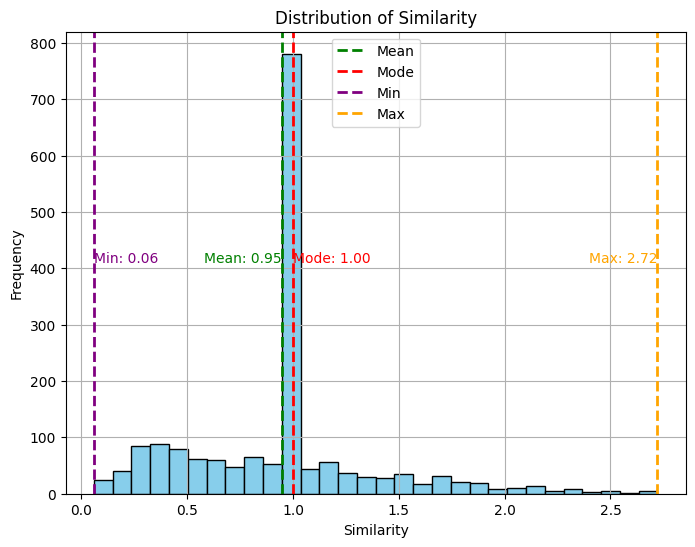

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the 'similarity' column as shown in the previous code.

# Calculate statistics
mean_similarity = frequent_items_with_support['similarity'].mean()
mode_similarity = frequent_items_with_support['similarity'].mode().iloc[0]
min_similarity = frequent_items_with_support['similarity'].min()
max_similarity = frequent_items_with_support['similarity'].max()

# Plot the distribution of the 'similarity' column
plt.figure(figsize=(8, 6))
plt.hist(frequent_items_with_support['similarity'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_similarity, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mode_similarity, color='red', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(min_similarity, color='purple', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_similarity, color='orange', linestyle='dashed', linewidth=2, label='Max')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity')
plt.legend()
plt.grid(True)

# Add text annotations for the statistics
plt.text(mean_similarity, plt.ylim()[1] * 0.50, f"Mean: {mean_similarity:.2f}", color='green', ha='right')
plt.text(mode_similarity, plt.ylim()[1] * 0.50, f"Mode: {mode_similarity:.2f}", color='red', ha='left')
plt.text(min_similarity, plt.ylim()[1] * 0.50, f"Min: {min_similarity:.2f}", color='purple', ha='left')
plt.text(max_similarity, plt.ylim()[1] * 0.50, f"Max: {max_similarity:.2f}", color='orange', ha='right')

plt.show()


In [ ]:
# Set the similarity threshold
similarity_threshold = 1  # You can adjust this threshold as needed

# Filter rows based on the similarity threshold
filtered_items_with_support = frequent_items_with_support[frequent_items_with_support['similarity'] > similarity_threshold]
filtered_items_with_support.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length,similarity
1253,"(89805, 64911)",0.003689,2,1.606705
1127,"(35729, 89805)",0.003373,2,1.719965
1307,"(89805, 110903)",0.003057,2,1.758686
924,"(89805, 12751)",0.002424,2,1.672992
910,"(89805, 11991)",0.002108,2,1.121992


In [ ]:
filtered_items_with_support.count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemsets      394
support       394
length        394
similarity    394
dtype: int64

In [ ]:
import pandas as pd
import networkx as nx

# Assuming you have the DataFrame 'filtered_items_without_support' and 'G' (the directed graph)

# Function to calculate the average similarity of an itemset
def calculate_average_similarity(itemset, graph):
    total_similarity = 0
    num_pairs = 0
    for i in range(len(itemset)):
        for j in range(i + 1, len(itemset)):
            similarity = nx.shortest_path_length(graph, source=itemset[i], target=itemset[j])
            total_similarity += similarity
            num_pairs += 1

    if num_pairs == 0:
        return 0  # Avoid division by zero

    return total_similarity / num_pairs

# Calculate average similarity for each itemset
filtered_items_without_support['average_similarity'] = filtered_items_without_support['itemsets'].apply(
    lambda itemset: calculate_average_similarity(itemset, G)
)

# Filter itemsets with length greater than 2
itemsets_length_greater_than_2 = filtered_items_without_support[filtered_items_without_support['itemsets'].apply(len) > 2]

# Find the itemset with the highest similarity between any two items
max_similarity_itemset = itemsets_length_greater_than_2.iloc[itemsets_length_greater_than_2['average_similarity'].idxmax()]

print("Itemset with highest similarity between any two items:")
print(max_similarity_itemset['itemsets'])
print("Average similarity in the itemset:")
print(max_similarity_itemset['average_similarity'])


In [ ]:
# Set the similarity threshold
similarity_threshold = 1  # You can adjust this threshold as needed

# Filter rows based on the similarity threshold
filtered_items_without_support = frequent_items_with_support[frequent_items_with_support['similarity'] <= similarity_threshold]
filtered_items_without_support.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length,similarity
527,(89805),0.014862,1,1.0
274,(38535),0.010857,1,1.0
10,(492),0.007062,1,1.0
208,(27705),0.006008,1,1.0
20,(1276),0.005481,1,1.0


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Calculate the length of each itemset and add it as a new column 'length'
filtered_items_without_support['length'] = filtered_items_without_support['itemsets'].apply(lambda x: len(x))

# Calculate the mean and mode of the 'length' column
mean_length = filtered_items_without_support['length'].mean()
mode_length = filtered_items_without_support['length'].mode().iloc[0]

# Display the frequent items along with their support values and the calculated mean and mode of the length
print("Mean Length of Itemsets:", mean_length)
print("Mode Length of Itemsets:", mode_length)
filtered_items_without_support.head()

# Group the frequent itemsets by their lengths and calculate the count of itemsets for each length
itemsets_count_by_length = filtered_items_without_support.groupby('length').count()

# Rename the column to 'count'
itemsets_count_by_length.rename(columns={'itemsets': 'count'}, inplace=True)

# Display the itemsets count by length
itemsets_count_by_length.head()


Mean Length of Itemsets: 1.6578947368421053
Mode Length of Itemsets: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-61-21a55adeac15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_items_without_support['length'] = filtered_items_without_support['itemsets'].apply(lambda x: len(x))


,count,support,similarity
length,,,
1,727,727,727
2,408,408,408
3,209,209,209
4,22,22,22
5,2,2,2


In [ ]:
unique_items = list(set(item for itemset in filtered_items_without_support['itemsets'] for item in itemset))
print(unique_items)

[122880, 49154, 6150, 61446, 116743, 8201, 102406, 276492, 40973, 2062, 8209, 24599, 63511, 157722, 49179, 157724, 22555, 165916, 86049, 53285, 157735, 116779, 55, 47159, 190533, 116808, 18506, 299086, 4177, 102482, 53329, 67666, 57429, 4182, 61527, 88, 67674, 2143, 34911, 6241, 10339, 249964, 2157, 18541, 192624, 92274, 90227, 176243, 47220, 104567, 22651, 102524, 36989, 24704, 128, 16514, 2177, 51334, 53383, 34950, 16523, 71822, 51342, 10392, 43168, 16546, 16547, 167, 213163, 57521, 188596, 57525, 98493, 75966, 2237, 8391, 78028, 71888, 18641, 32979, 39124, 90325, 45272, 69851, 4322, 80101, 14565, 14567, 30954, 20718, 59636, 69883, 14588, 69891, 59654, 145675, 51472, 6418, 14611, 28951, 14615, 278811, 22814, 6435, 37162, 63790, 57648, 110903, 327996, 129341, 28993, 2369, 110916, 2373, 35144, 45391, 287057, 45395, 92500, 86357, 43347, 141656, 176473, 94553, 29021, 53598, 360, 31084, 47470, 137587, 47477, 16766, 14721, 390, 65926, 392, 22924, 125327, 10650, 27036, 4509, 16801, 149922, 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the list of unique items by converting sets to a list of items and then flattening the list
all_items = [item for itemset in filtered_items_without_support['itemsets'] for item in itemset]
unique_items = list(set(all_items))

item_support = {item: all_items.count(item) / len(df_encoded) for item in unique_items}
# Set the threshold for support (e.g., 0.1)
threshold = 0.005

# Filter out items with support above the threshold
output_list = [item for item, support in item_support.items() if support > threshold]

print("Support for each item:")
print(item_support)

print("Items with support above the threshold ({}):".format(threshold))
print(output_list)

Support for each item:
{122880: 0.00010540739959945188, 49154: 0.00010540739959945188, 6150: 0.000843259196795615, 61446: 0.00010540739959945188, 116743: 0.00010540739959945188, 8201: 0.00010540739959945188, 102406: 0.00010540739959945188, 276492: 0.00010540739959945188, 40973: 0.00010540739959945188, 2062: 0.00021081479919890376, 8209: 0.00010540739959945188, 24599: 0.00021081479919890376, 63511: 0.00010540739959945188, 157722: 0.00010540739959945188, 49179: 0.00021081479919890376, 157724: 0.00010540739959945188, 22555: 0.00021081479919890376, 165916: 0.00010540739959945188, 86049: 0.00010540739959945188, 53285: 0.00010540739959945188, 157735: 0.00010540739959945188, 116779: 0.00010540739959945188, 55: 0.00010540739959945188, 47159: 0.00010540739959945188, 190533: 0.00010540739959945188, 116808: 0.0022135553915884894, 18506: 0.00010540739959945188, 299086: 0.00010540739959945188, 4177: 0.00031622219879835566, 102482: 0.00010540739959945188, 53329: 0.00010540739959945188, 67666: 0.0001

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import networkx as nx

# Assuming you have the DataFrame 'filtered_items_without_support' and 'G' (the directed graph)

# Function to calculate the maximum similarity of an itemset
def calculate_max_similarity(itemset, graph):
    max_similarity = 0
    for i in itemset:
        for j in itemset:
            if i != j:  # Avoid comparing the same item
                #similarity = nx.shortest_path_length(graph, source=i, target=j)
                similarity=combined_similarity(i,j,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
                max_similarity = max(max_similarity, similarity)

    return max_similarity

# Convert frozensets to sets in the 'itemsets' column
filtered_items_without_support['itemsets'] = filtered_items_without_support['itemsets'].apply(set)

# Calculate maximum similarity for each itemset
filtered_items_without_support['max_similarity'] = filtered_items_without_support['itemsets'].apply(
    lambda itemset: calculate_max_similarity(itemset, G)
)
filtered_output = filtered_items_without_support[filtered_items_without_support['max_similarity'] > 1 ]

filtered_output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-92-ec25dc5f6e3b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_items_without_support['itemsets'] = filtered_items_without_support['itemsets'].apply(set)
<ipython-input-92-ec25dc5f6e3b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,itemsets,support,length,similarity,max_similarity
1525,"{26158, 89805, 67382}",0.001476,3,0.875347,1.081393
1600,"{89805, 35729, 78701}",0.001370,3,0.955078,1.719965
1635,"{89805, 42172, 78701}",0.001265,3,0.649904,1.021428
1667,"{89805, 78701, 64911}",0.001265,3,0.904227,1.606705
1594,"{89805, 35729, 51181}",0.001265,3,0.790258,1.719965
...,...,...,...,...,...
1409,"{3994, 89805, 15439}",0.000949,3,0.728765,1.624770
1420,"{5137, 89805, 15439}",0.000949,3,0.789235,1.741596
1386,"{92274, 1276, 110903}",0.000949,3,0.938320,1.794653
1389,"{42172, 89805, 3287}",0.000949,3,0.712655,1.094860


In [ ]:
import pandas as pd
import networkx as nx

# Assuming you have the DataFrame 'filtered_items_without_support' and 'G' (the directed graph)

# Function to calculate the maximum similarity and item with minimum similarity of an itemset
def calculate_similarity_metrics(itemset, graph):
    max_similarity = 0
    min_similarity_item = None

    for i in itemset:
        for j in itemset:
            if i != j:  # Avoid comparing the same item
                similarity = combined_similarity(i,j,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
                if similarity > max_similarity:
                    max_similarity = similarity
                if min_similarity_item is None or similarity < min_similarity_item[1]:
                    min_similarity_item = (j, similarity)

    return max_similarity, min_similarity_item

# Convert frozensets to sets in the 'itemsets' column
filtered_output['itemsets'] = filtered_output['itemsets'].apply(set)

# Calculate maximum similarity and item with minimum similarity for each itemset
filtered_output[['max_similarity', 'min_similarity_item']] = filtered_output['itemsets'].apply(
    lambda itemset: pd.Series(calculate_similarity_metrics(itemset, G))
)

# Remove item with minimum similarity for each itemset
filtered_output['itemsets'] = filtered_output.apply(
    lambda row: row['itemsets'] - {row['min_similarity_item'][0]},
    axis=1
)

# Drop unnecessary columns
#filtered_output = filtered_output.drop(['max_similarity', 'min_similarity_item'], axis=1)

filtered_output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-93-5e0f93d0f4e8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_output['itemsets'] = filtered_output['itemsets'].apply(set)
<ipython-input-93-5e0f93d0f4e8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,itemsets,support,length,similarity,max_similarity,min_similarity_item
1525,"{67382, 26158}",0.001476,3,0.875347,1.081393,"(89805, 0.505291934005874)"
1600,"{35729, 89805}",0.001370,3,0.955078,1.719965,"(78701, 0.18353763008553542)"
1635,"{42172, 89805}",0.001265,3,0.649904,1.021428,"(78701, 0.18353763008553542)"
1667,"{89805, 64911}",0.001265,3,0.904227,1.606705,"(78701, 0.18353763008553542)"
1594,"{35729, 89805}",0.001265,3,0.790258,1.719965,"(51181, 0.2830722666314557)"
...,...,...,...,...,...,...
1409,"{3994, 15439}",0.000949,3,0.728765,1.624770,"(89805, 0.20156306635761745)"
1420,"{5137, 15439}",0.000949,3,0.789235,1.741596,"(89805, 0.2661461507040765)"
1386,"{92274, 110903}",0.000949,3,0.938320,1.794653,"(1276, 0.2640092551454398)"
1389,"{42172, 89805}",0.000949,3,0.712655,1.094860,"(3287, 0.2983596514133582)"


In [ ]:
# Assuming you have already defined the S1 function or any other similarity function.

# Function to calculate the average similarity between all pairs of users in a set
def average_similarity(itemset, similarity_function, followers_dict):
    if len(itemset) == 1:
        return 1.0  # If the set has only 1 item, the similarity is 1

    total_similarity = 0.0
    total_pairs = 0

    # Calculate the similarity between all pairs of users in the set
    for i in itemset:
        for j in itemset:
            if i != j:
                total_similarity += combined_similarity(i,j,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
                total_pairs += 1

    # Calculate the average similarity


    return average_sim

# Assuming you have the followers_dict dictionary that contains user followers data

# Add a new column 'similarity' to the frequent_items_with_support DataFrame
filtered_output['similarity'] = filtered_output['itemsets'].apply(
    lambda itemset: average_similarity(itemset, S1, followers_dict)
)

# Display the DataFrame with the new 'similarity' column
filtered_output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-94-455cc2a9ff35>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_output['similarity'] = filtered_output['itemsets'].apply(


,itemsets,support,length,similarity,max_similarity,min_similarity_item
1525,"{67382, 26158}",0.001476,3,1.081393,1.081393,"(89805, 0.505291934005874)"
1600,"{35729, 89805}",0.001370,3,1.719965,1.719965,"(78701, 0.18353763008553542)"
1635,"{42172, 89805}",0.001265,3,0.744747,1.021428,"(78701, 0.18353763008553542)"
1667,"{89805, 64911}",0.001265,3,1.606705,1.606705,"(78701, 0.18353763008553542)"
1594,"{35729, 89805}",0.001265,3,1.719965,1.719965,"(51181, 0.2830722666314557)"
...,...,...,...,...,...,...
1409,"{3994, 15439}",0.000949,3,1.624770,1.624770,"(89805, 0.20156306635761745)"
1420,"{5137, 15439}",0.000949,3,1.741596,1.741596,"(89805, 0.2661461507040765)"
1386,"{92274, 110903}",0.000949,3,1.794653,1.794653,"(1276, 0.2640092551454398)"
1389,"{42172, 89805}",0.000949,3,0.744747,1.094860,"(3287, 0.2983596514133582)"


In [ ]:
filtered_output1 = filtered_output[ filtered_output['length'] > 3]
filtered_output1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length,similarity,max_similarity,min_similarity_item
1732,"{92274, 22924, 42172}",0.001054,4,1.432576,2.561945,"(89805, 0.38207118338585827)"
1697,"{10339, 1276, 80101}",0.000949,4,0.739385,1.086101,"(89805, 0.1479925003297589)"
1702,"{42172, 89805, 1276}",0.000949,4,0.721391,1.033480,"(26158, 0.14165612416599407)"
1703,"{1276, 89805, 110903}",0.000949,4,1.050679,1.758686,"(26158, 0.14165612416599407)"
1705,"{92274, 42172, 89805}",0.000949,4,1.229588,2.561945,"(1276, 0.2640092551454398)"
1709,"{92274, 89805, 110903}",0.000949,4,1.311803,1.794653,"(1276, 0.2640092551454398)"
1741,"{56968, 89805, 39885}",0.000949,4,0.646577,1.918901,"(92274, 0.38207118338585827)"
1742,"{89805, 39885, 64911}",0.000949,4,1.303819,1.606705,"(78701, 0.18353763008553542)"
1712,"{3994, 3972, 163806}",0.000949,4,1.505558,2.675795,"(89805, 0.20156306635761745)"


In [ ]:
frequent_items_with_support


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length,similarity,average_similarity,max_similarity,min_similarity
527,(89805),0.014862,1,1.000000,1.000000,1.000000,1.000000
274,(38535),0.010857,1,1.000000,1.000000,1.000000,1.000000
10,(492),0.007062,1,1.000000,1.000000,1.000000,1.000000
208,(27705),0.006008,1,1.000000,1.000000,1.000000,1.000000
20,(1276),0.005481,1,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
1267,"(90325, 69127)",0.000949,2,0.570557,0.570557,0.570557,0.570557
672,(179276),0.000949,1,1.000000,1.000000,1.000000,1.000000
666,(175276),0.000949,1,1.000000,1.000000,1.000000,1.000000
658,(165916),0.000949,1,1.000000,1.000000,1.000000,1.000000


In [ ]:
def calculate_support(itemset, transactions):
    count = 0
    for transaction in transactions:
        if set(itemset).issubset(transaction):
            count += 1
    support = count / len(transactions)
    return support

# Example usage:
transactions = [
    {'apple', 'banana', 'orange'},
    {'banana', 'orange'},
    {'apple', 'banana'},
    {'apple', 'orange'},
    {'apple'}
]

itemset = {'apple', 'banana'}

support = calculate_support(itemset, transactions)
print(f"The support of {itemset} is: {support}")


In [ ]:
import pandas as pd
import networkx as nx

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(DF, source='ID1', target='ID2', create_using=nx.DiGraph())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import networkx as nx

# Function to calculate the shortest path distance between two nodes in the graph
def calculate_shortest_distance(graph, source_node, target_node):
    try:
        # Calculate the shortest path distance
        shortest_distance = nx.shortest_path_length(graph, source=source_node, target=target_node)
        return shortest_distance
    except nx.NetworkXNoPath:
        # If there is no path between the nodes, return -1 to indicate no connection
        return -1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nx.shortest_path_length(G, source=1, target=2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [ ]:
distance = calculate_shortest_distance(G, 1, 2)
if distance != -1:
    print(f"The shortest path distance between {source_node} and {target_node} is: {distance}")
else:
    print(f"There is no path between {source_node} and {target_node}.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored